The bias-variance tradeoff
---

In this notebook we explore the tradeoff between models with _high bias_ (simple models that do not fit the training data very well) and models with _high variance_ (complex models, often with many degrees of freedom, that fit the training data well but do not generalize well to new, unseen data).

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

We begin by generating some sample data to work on. We generate 30 samples that are irregularly spaced in the $x$-direction, and for which the $y$-component is the cosine plus some Gaussian noise. These samples are split into training and test datasets, and the samples are plotted.

In [3]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30

x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1

X = x.reshape(-1, 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

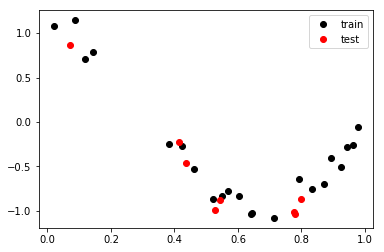

In [5]:
plt.plot(X_train, y_train, 'ko', label='train')
plt.plot(X_test, y_test, 'ro', label='test')
plt.legend();

We now try to fit a polynomial model to the training data. The main parameter for this model is the _degree_ of the polynomial, which determines (roughly speaking) how well the polynomial is able to "wiggle about" to fit the data. We start off with a degree-3 polynomial, which seems to do a reasonable job of fitting the data and reproducing the underlying model.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [7]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                  ('lm', LinearRegression())])

In [8]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('lm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

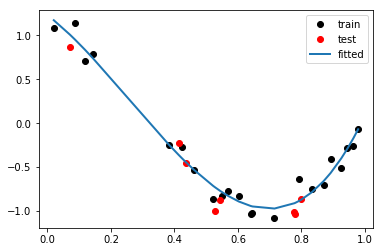

In [9]:
plt.plot(X_train, y_train, 'ko', label='train')
plt.plot(X_test, y_test, 'ro', label='test')

plt.plot(X, model.predict(X), lw=2, label='fitted')

plt.legend();

To quickly visualize the effect of varying the degree of the polynomial, we put together an interactive IPython widget. Note: to use this you may have to install the `ipywidgets` library.

In [10]:
from ipywidgets import interact, IntSlider

def make_and_train(deg):
    model = Pipeline([('poly', PolynomialFeatures(degree=deg, include_bias=False)), 
                      ('lm', LinearRegression())])
    model.fit(X_train, y_train)
    return model

def make_plot_for_degree(deg):
    model = make_and_train(deg)
    
    plt.plot(X_train, y_train, 'ko')
    plt.plot(X_test, y_test, 'ro')

    plt.plot(X, model.predict(X), lw=2)
    plt.show()
    
interact(make_plot_for_degree, deg=IntSlider(min=1, max=20, step=1, value=3));

By moving around the slider and observing the fit on training and test data, it appears that there is a sweet spot for which the model fits the data reasonably well. Another way to visualize this is to plot the error on both training and test data: while the error on training data keeps decreasing with increasing degree (after all, we have more and more degrees of freedom), the error on the test data stabilises around degree 4-5, and then increases again.

In [11]:
degrees = list(range(2, 12))
train_errors = []
test_errors = []
for deg in degrees:
    model = make_and_train(deg)
    train_err = 1 - model.score(X_train, y_train)
    test_err = 1 - model.score(X_test, y_test)
    train_errors.append(train_err)
    test_errors.append(test_err)

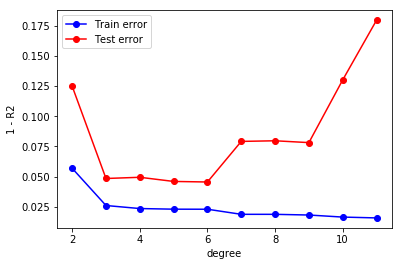

In [12]:
plt.plot(degrees, train_errors, 'b-o', label="Train error")
plt.plot(degrees, test_errors, 'r-o', label="Test error")

plt.xlabel("degree")
plt.ylabel("1 - R2")
plt.legend();